In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import scipy.stats as stats



In [2]:
df = pd.read_csv("ambur.csv")
pd.set_option("display.max_columns", None)
df

,YEAR,MO,DY,HR,T2M,RH2M,PRECTOTCORR,PS,WS50M
0,2011,6,1,5,23.22,87.06,0.01,94.53,5.18
1,2011,6,1,6,24.47,79.94,0.00,94.58,4.91
2,2011,6,1,7,27.87,62.81,0.00,94.62,5.05
3,2011,6,1,8,30.62,52.69,0.01,94.62,3.79
4,2011,6,1,9,32.59,46.81,0.02,94.60,3.61
...,...,...,...,...,...,...,...,...,...
86203,2021,4,1,0,26.58,59.19,0.00,94.57,5.68
86204,2021,4,1,1,26.01,61.69,0.00,94.50,5.42
86205,2021,4,1,2,25.51,64.25,0.00,94.47,5.18
86206,2021,4,1,3,25.08,66.62,0.00,94.47,5.12


In [3]:
numerical_feature = [
    feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature = [feature for feature in numerical_feature if len(
    df[feature].unique()) < 32]
continuous_feature = [
    feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [
    feature for feature in df.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))


Numerical Features Count 9
Discrete feature Count 4
Continuous feature Count 5
Categorical feature Count 0


In [4]:
# Handle Missing Values
df.isnull().sum()*100/len(df)



YEAR           0.0
MO             0.0
DY             0.0
HR             0.0
T2M            0.0
RH2M           0.0
PRECTOTCORR    0.0
PS             0.0
WS50M          0.0
dtype: float64

In [5]:
print(numerical_feature)


['YEAR', 'MO', 'DY', 'HR', 'T2M', 'RH2M', 'PRECTOTCORR', 'PS', 'WS50M']


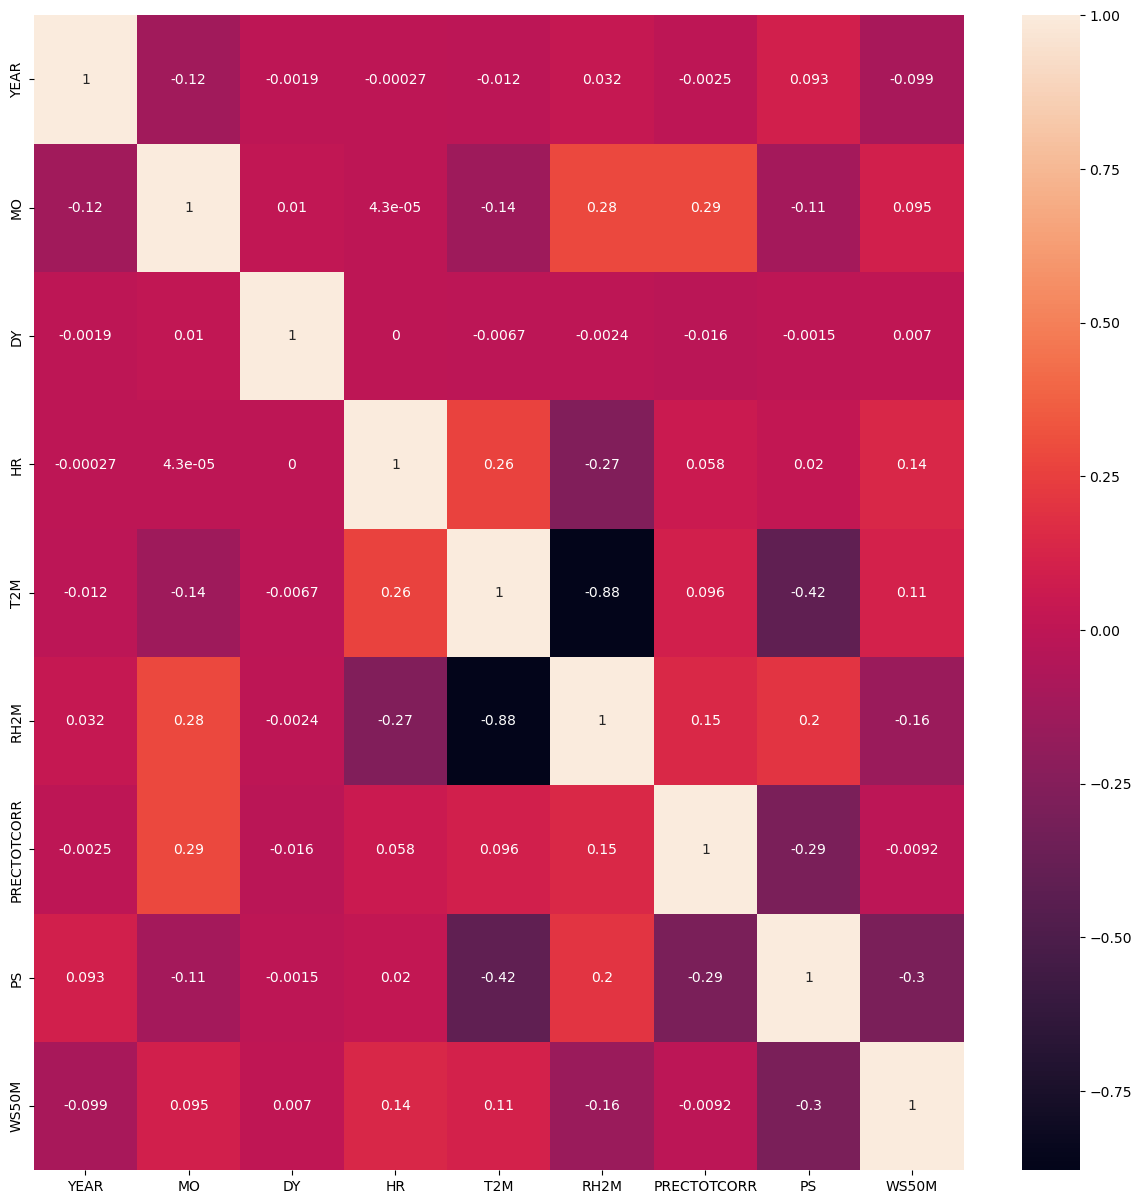

In [6]:
corrmat = df.corr(method = "spearman")
plt.figure(figsize=(15,15))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

In [7]:
data=df.copy()

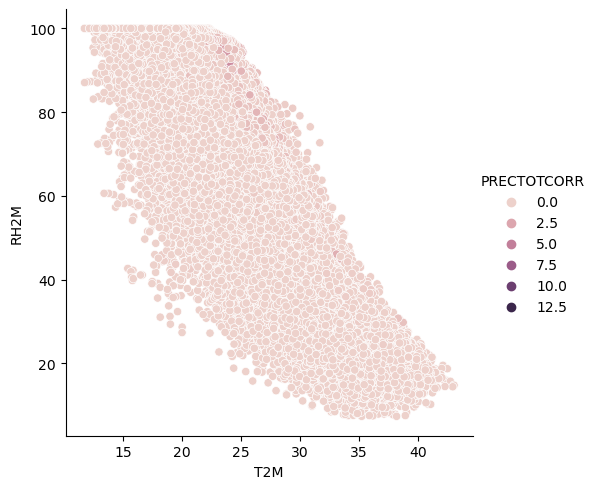

In [8]:
sns.relplot(x='T2M', y='RH2M', hue='PRECTOTCORR', data=data)
#QV :Humedity


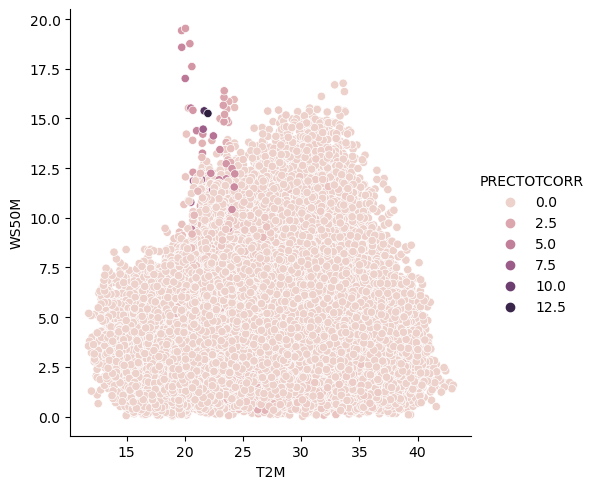

In [9]:
sns.relplot(x='T2M',y='WS50M',hue='PRECTOTCORR',data=data)

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


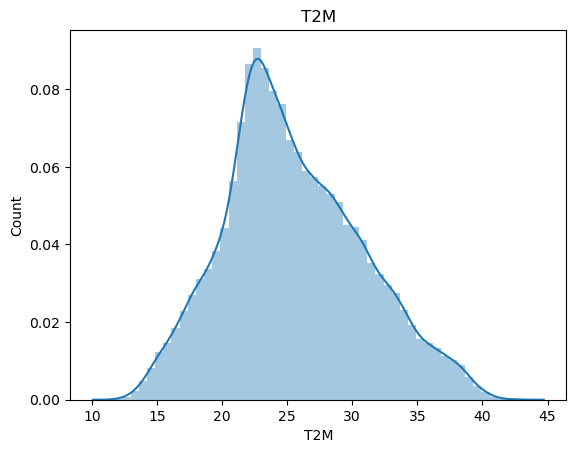

<Figure size 1500x1500 with 0 Axes>

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


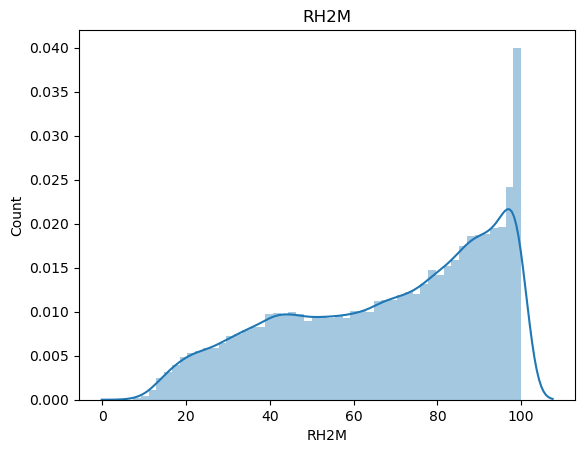

<Figure size 1500x1500 with 0 Axes>

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


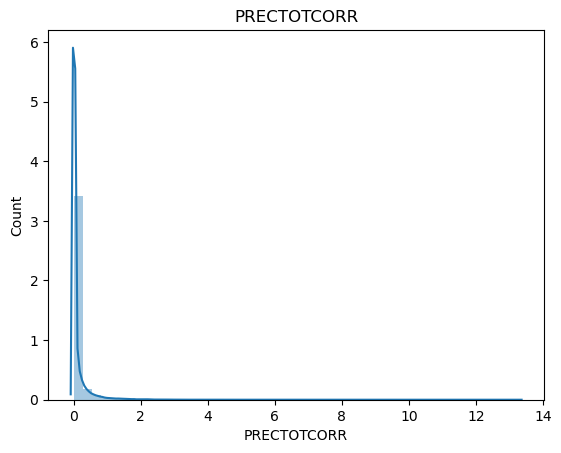

<Figure size 1500x1500 with 0 Axes>

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


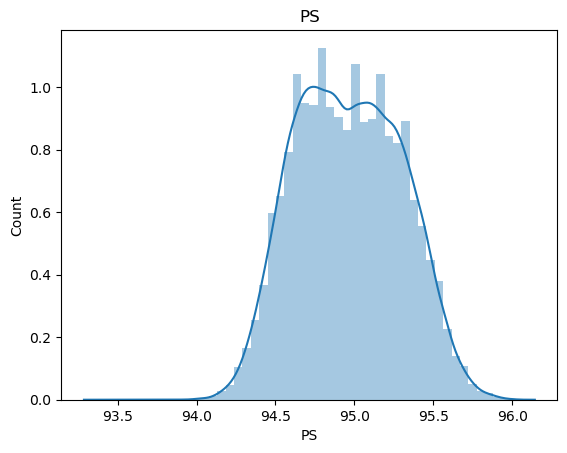

<Figure size 1500x1500 with 0 Axes>

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


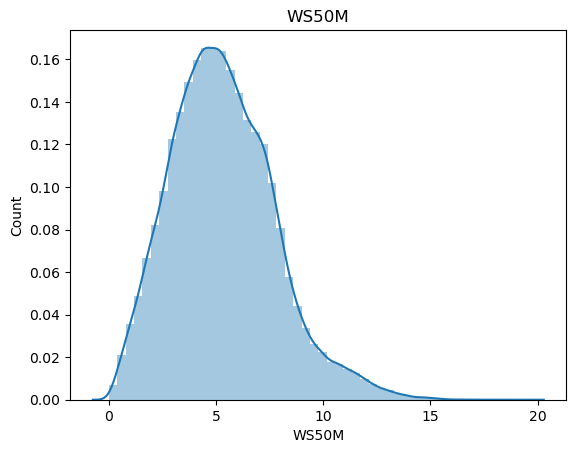

<Figure size 1500x1500 with 0 Axes>

In [10]:
for feature in continuous_feature:
    data = df.copy()
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15, 15))
    plt.show()


/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/hom

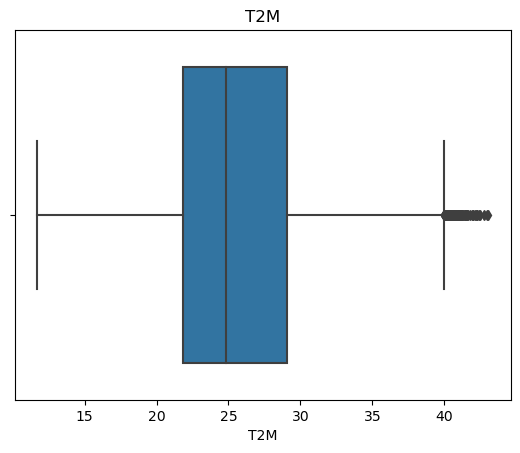

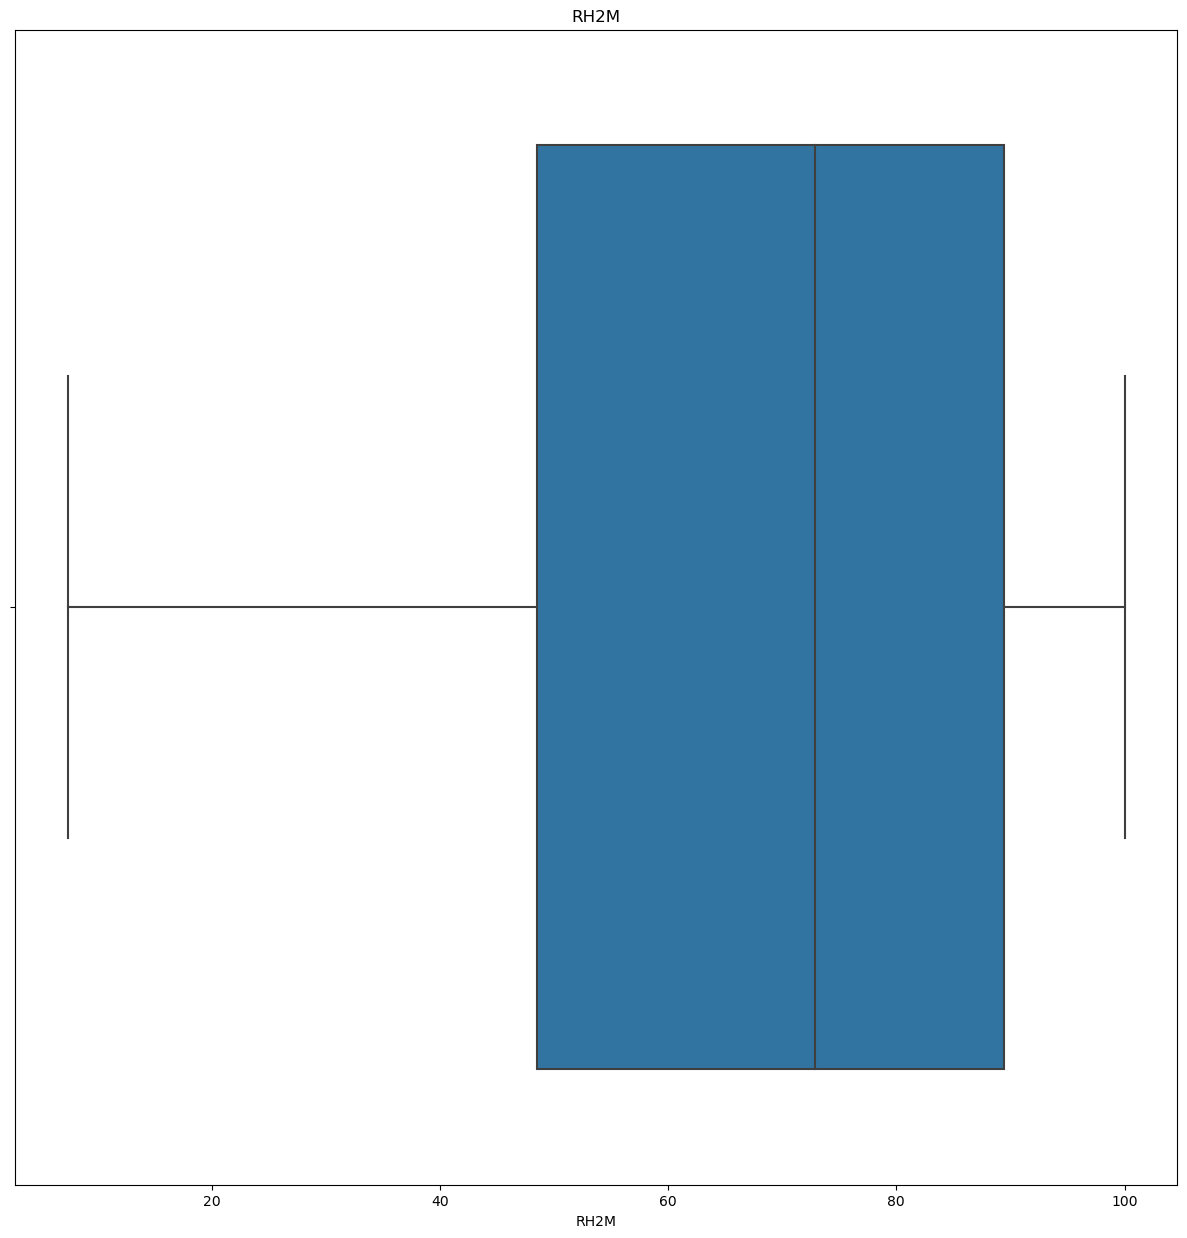

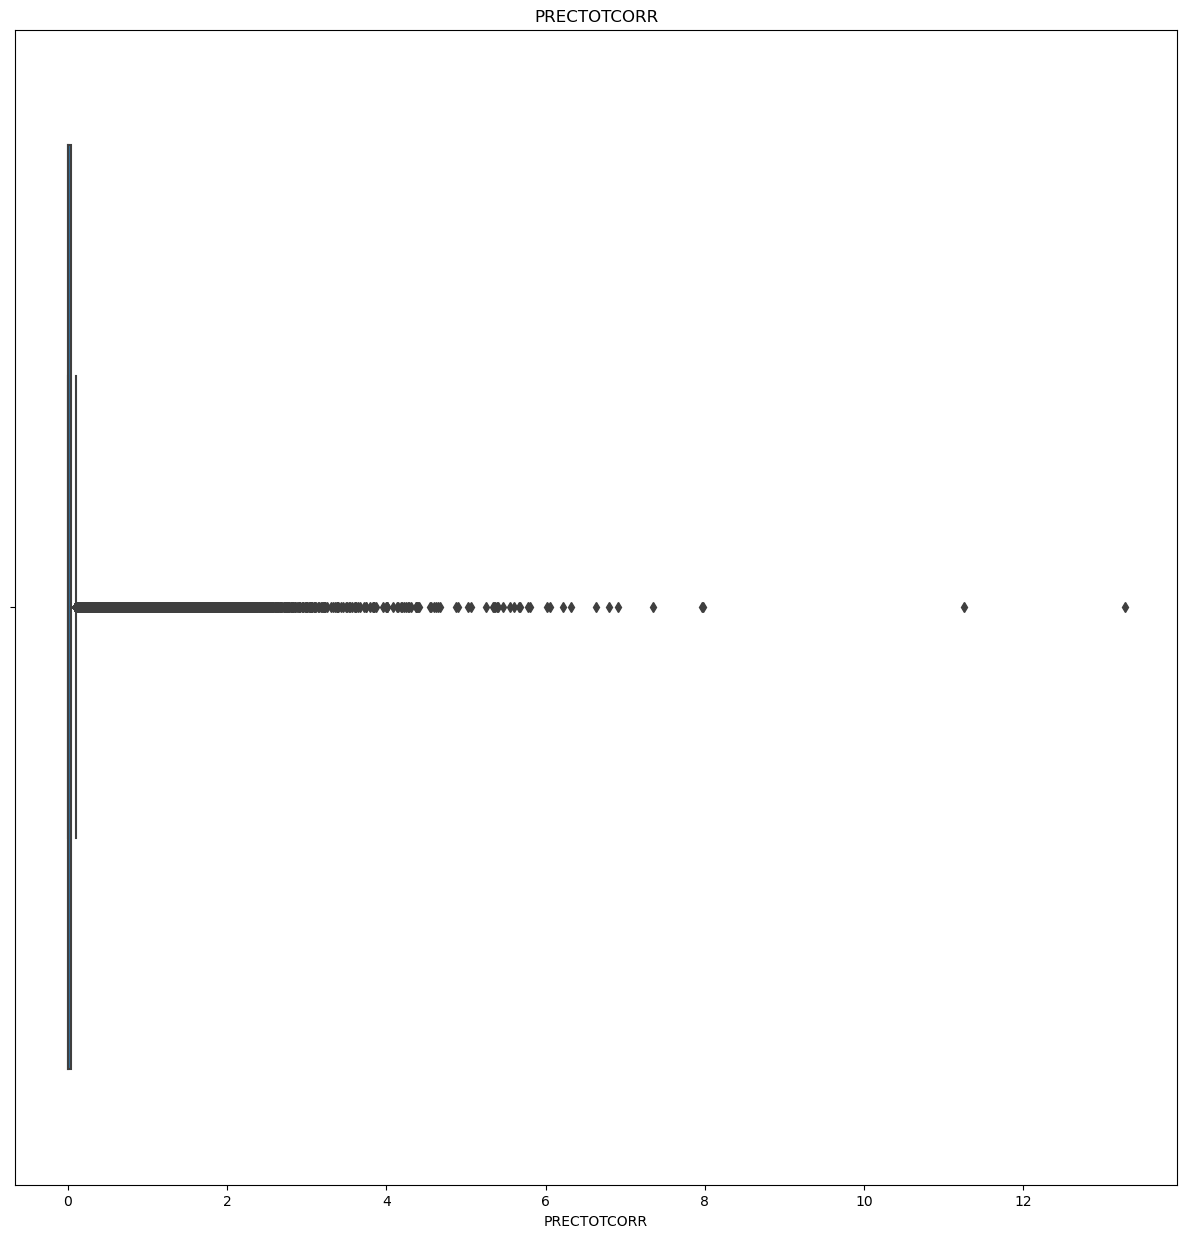

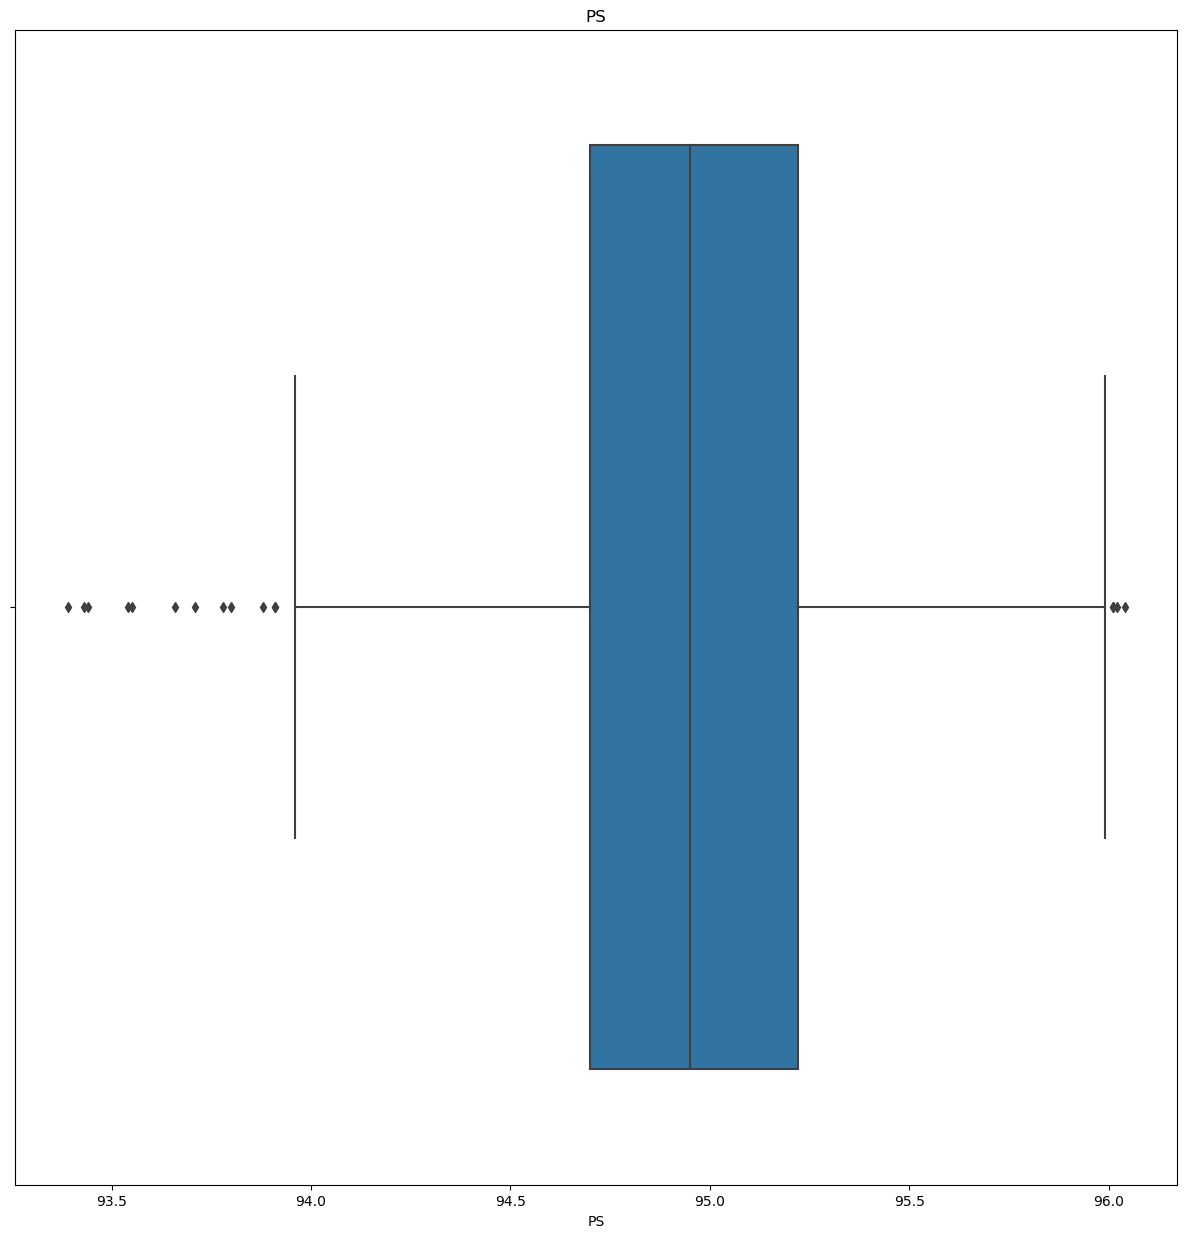

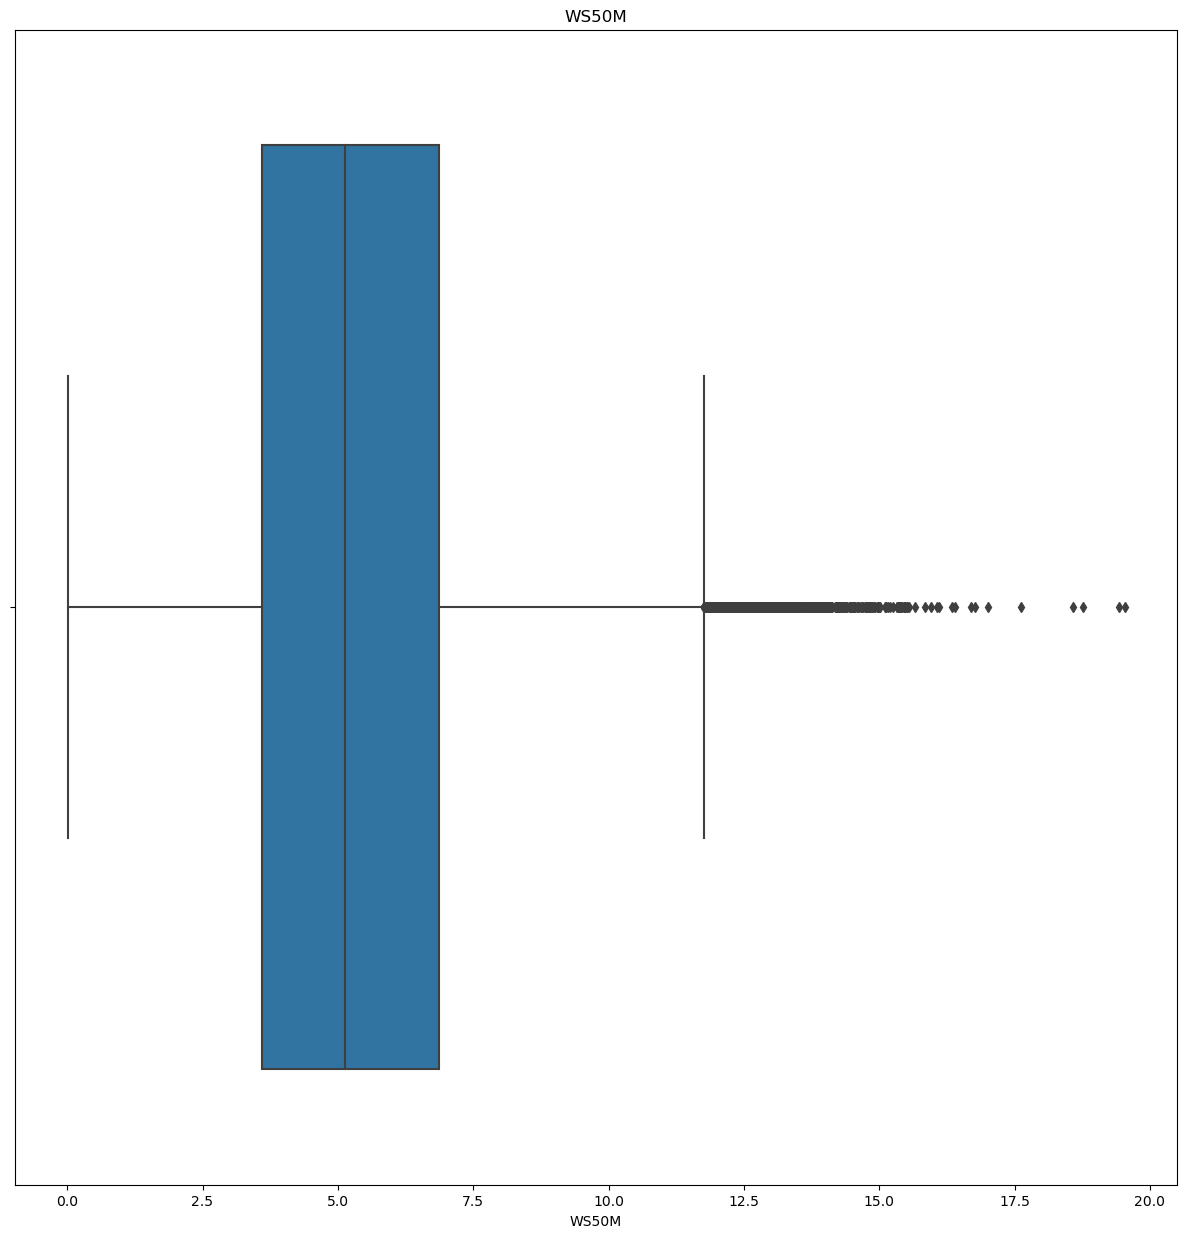

<Figure size 1500x1500 with 0 Axes>

In [11]:
#A for loop is used to plot a boxplot for all the continuous features to see the outliers
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

In [12]:
d=df.copy()

In [13]:
print(d["T2M"].unique())
print(type(df["T2M"].unique()))
print(d["PRECTOTCORR"].unique())
print(type(df["PRECTOTCORR"].unique()))
# print(d["WS50M_RANGE"].unique())
print(type(d["WS50M"].unique()))


[23.22 24.47 27.87 ... 41.13 40.86 40.02]
<class 'numpy.ndarray'>
[1.000e-02 0.000e+00 2.000e-02 4.000e-02 7.000e-02 8.000e-02 1.000e-01
 9.000e-02 1.100e-01 1.200e-01 1.500e-01 1.800e-01 1.900e-01 1.300e-01
 3.000e-02 6.000e-02 5.000e-02 1.700e-01 1.600e-01 4.500e-01 5.400e-01
 6.500e-01 7.100e-01 6.900e-01 4.200e-01 2.900e-01 2.600e-01 2.800e-01
 2.700e-01 1.400e-01 6.800e-01 8.000e-01 3.300e-01 2.200e-01 2.500e-01
 4.000e-01 3.400e-01 3.600e-01 9.300e-01 1.270e+00 1.110e+00 1.260e+00
 1.430e+00 1.440e+00 1.780e+00 1.790e+00 8.800e-01 6.100e-01 4.300e-01
 5.500e-01 5.900e-01 3.500e-01 2.000e-01 2.400e-01 2.100e-01 4.800e-01
 6.400e-01 4.100e-01 5.100e-01 3.800e-01 3.000e-01 3.700e-01 3.100e-01
 5.000e-01 2.300e-01 4.600e-01 9.600e-01 3.200e-01 4.700e-01 6.300e-01
 6.700e-01 7.200e-01 7.500e-01 7.400e-01 7.300e-01 7.900e-01 1.590e+00
 2.000e+00 2.300e+00 2.140e+00 1.970e+00 1.570e+00 1.820e+00 1.370e+00
 1.140e+00 9.900e-01 4.900e-01 5.700e-01 8.200e-01 8.600e-01 8.400e-01
 6.200e-01 

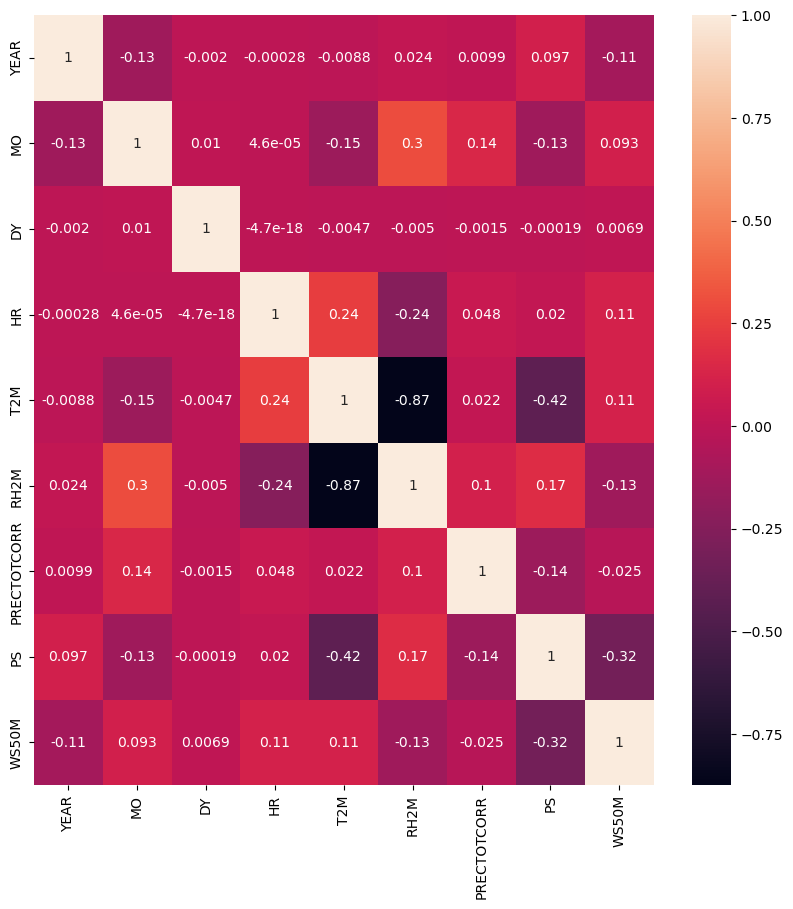

In [14]:
corrmat = d.corr()
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

In [15]:
def qq_plots(d, variable):
    plt.figure(figsize=(15, 10))
    plt.subplot(1, 2, 1)
    df[variable].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()


T2M


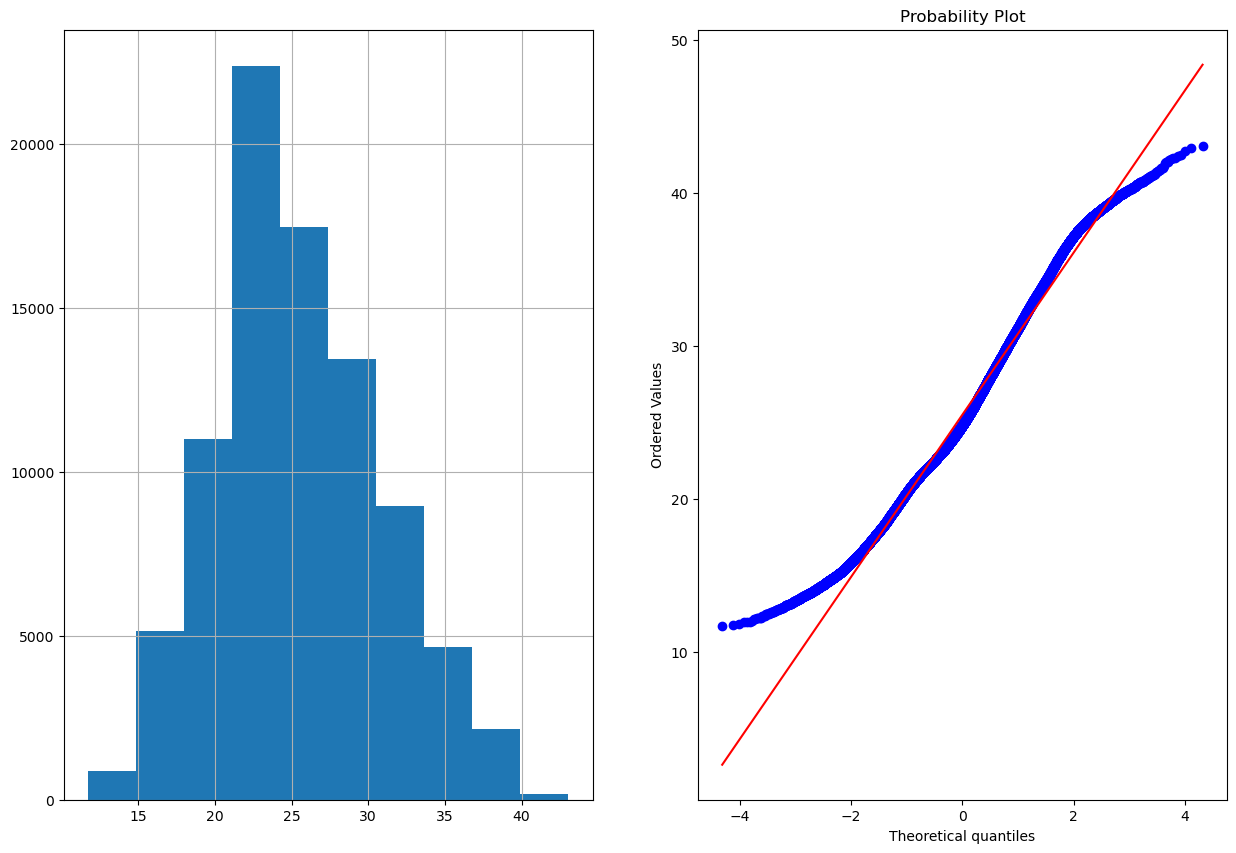

RH2M


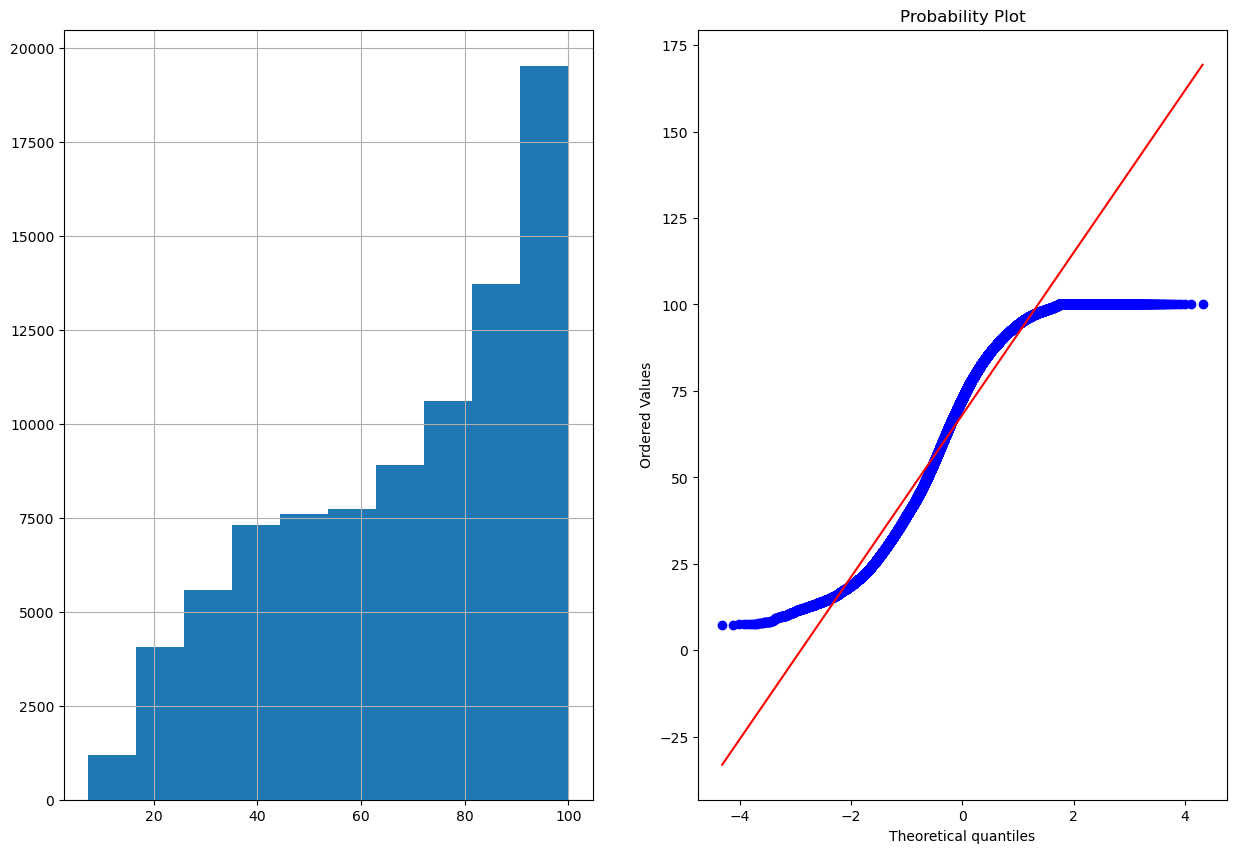

PRECTOTCORR


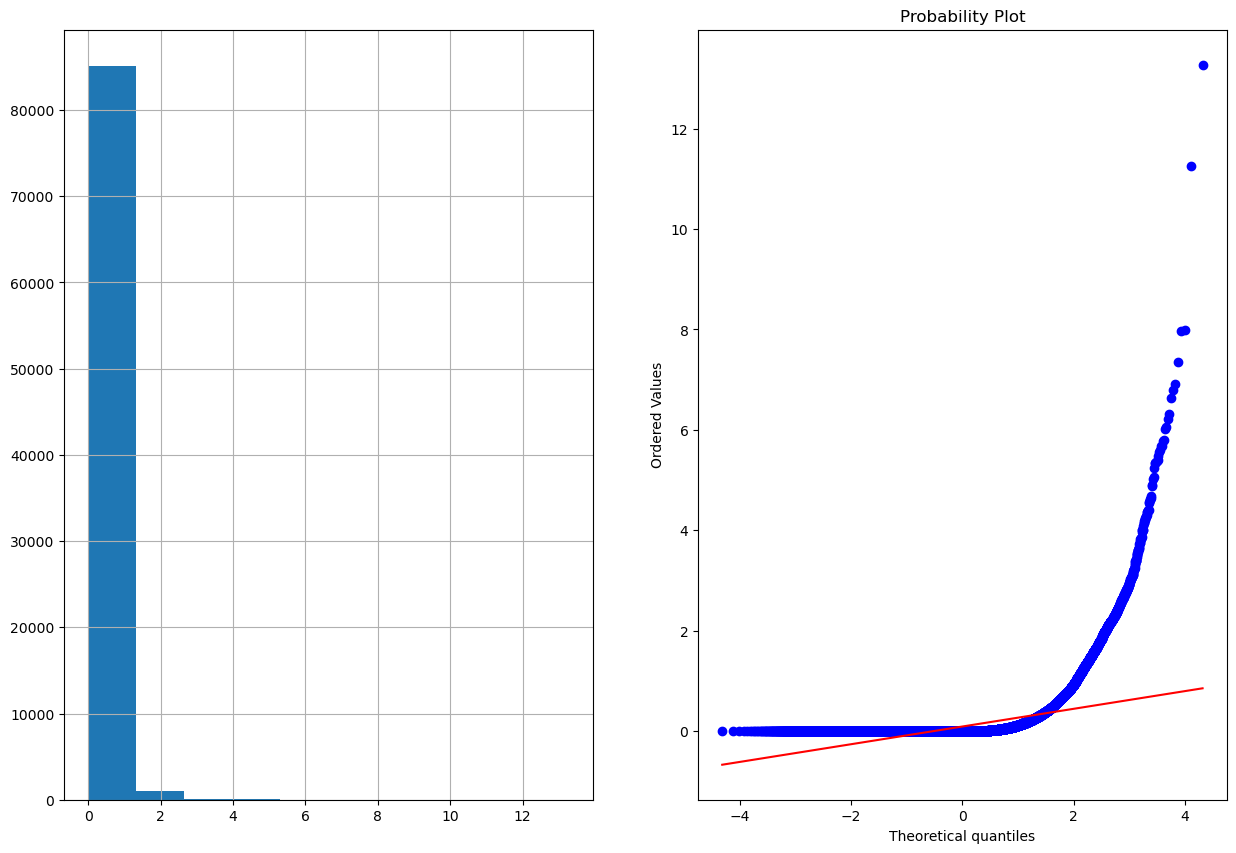

PS


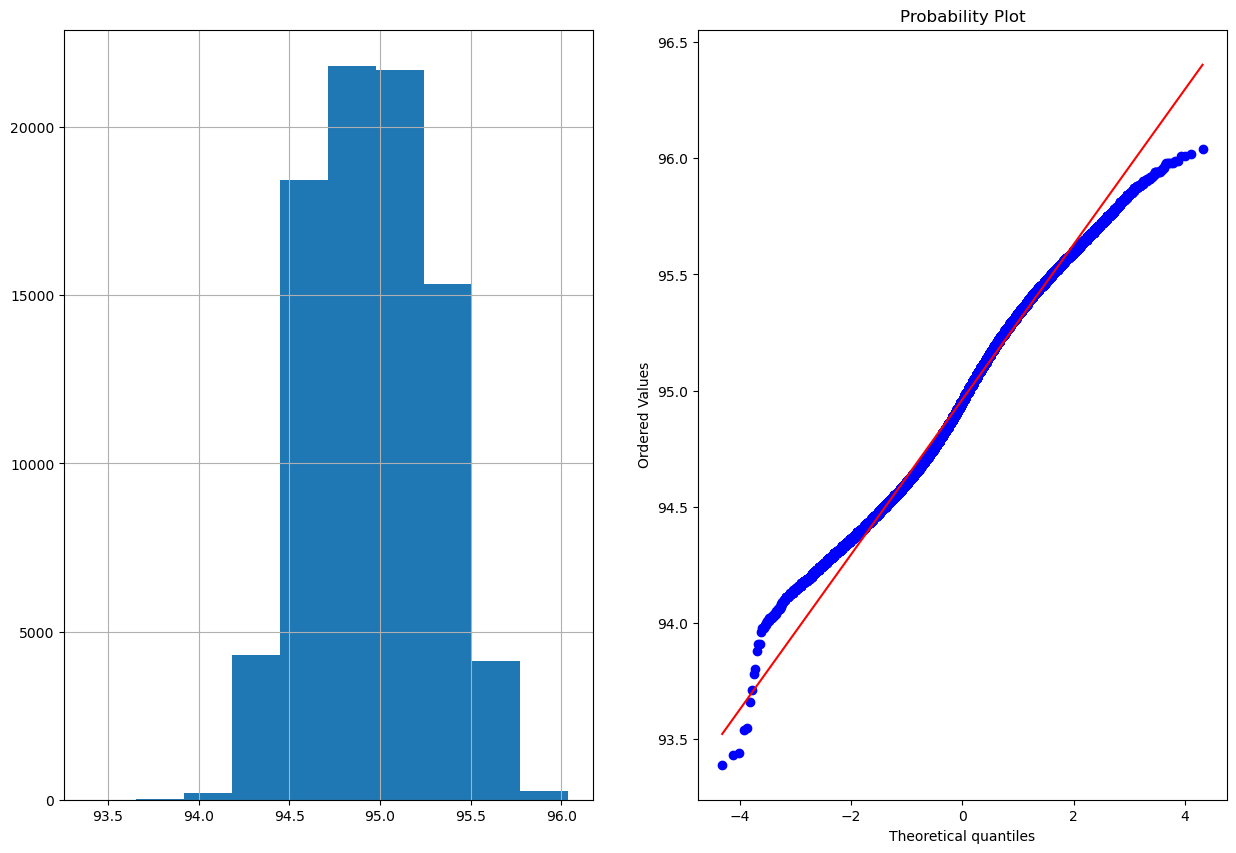

WS50M


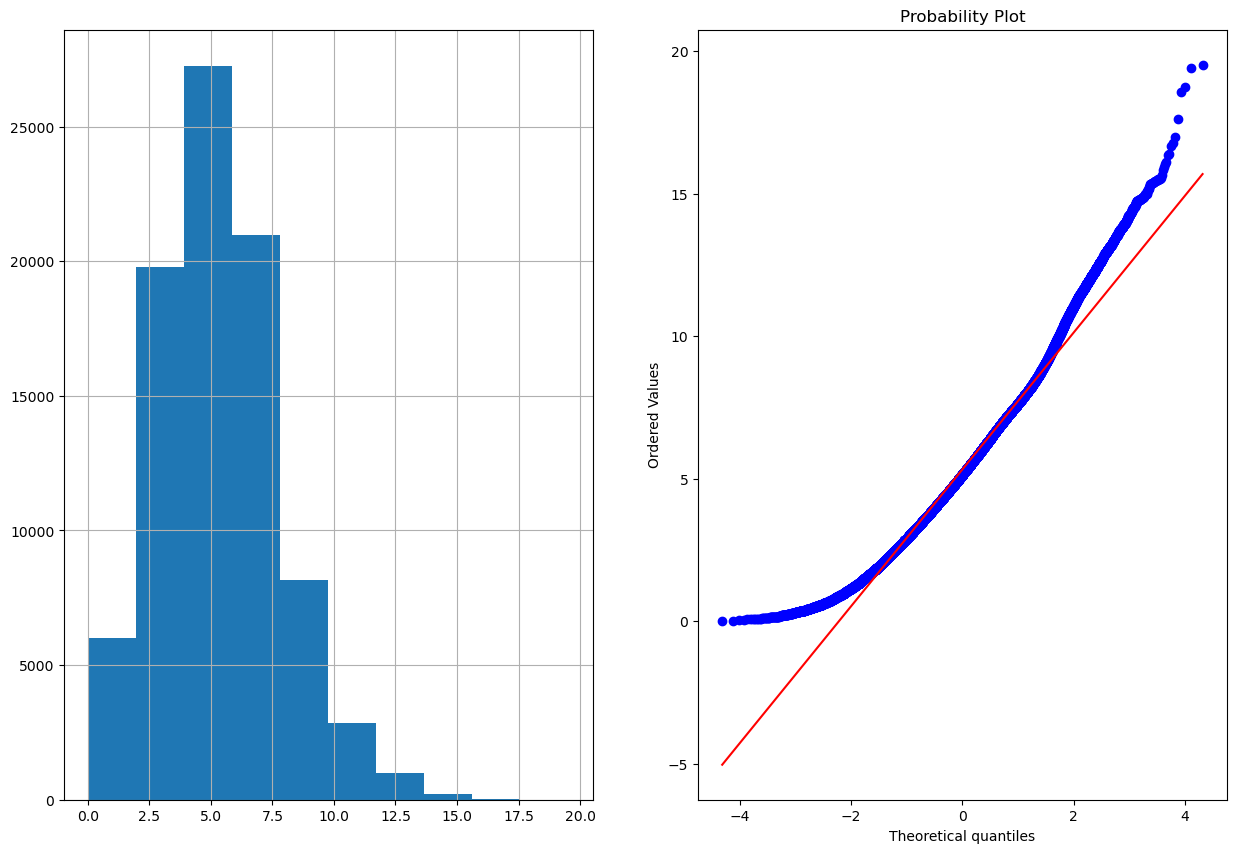

In [16]:
for feature in continuous_feature:
    print(feature)
    plt.figure(figsize=(15, 10))
    plt.subplot(1, 2, 1)
    df[feature].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[feature], dist="norm", plot=plt)
    plt.show()


In [17]:
d.PRECTOTCORR.unique()


array([1.000e-02, 0.000e+00, 2.000e-02, 4.000e-02, 7.000e-02, 8.000e-02,
       1.000e-01, 9.000e-02, 1.100e-01, 1.200e-01, 1.500e-01, 1.800e-01,
       1.900e-01, 1.300e-01, 3.000e-02, 6.000e-02, 5.000e-02, 1.700e-01,
       1.600e-01, 4.500e-01, 5.400e-01, 6.500e-01, 7.100e-01, 6.900e-01,
       4.200e-01, 2.900e-01, 2.600e-01, 2.800e-01, 2.700e-01, 1.400e-01,
       6.800e-01, 8.000e-01, 3.300e-01, 2.200e-01, 2.500e-01, 4.000e-01,
       3.400e-01, 3.600e-01, 9.300e-01, 1.270e+00, 1.110e+00, 1.260e+00,
       1.430e+00, 1.440e+00, 1.780e+00, 1.790e+00, 8.800e-01, 6.100e-01,
       4.300e-01, 5.500e-01, 5.900e-01, 3.500e-01, 2.000e-01, 2.400e-01,
       2.100e-01, 4.800e-01, 6.400e-01, 4.100e-01, 5.100e-01, 3.800e-01,
       3.000e-01, 3.700e-01, 3.100e-01, 5.000e-01, 2.300e-01, 4.600e-01,
       9.600e-01, 3.200e-01, 4.700e-01, 6.300e-01, 6.700e-01, 7.200e-01,
       7.500e-01, 7.400e-01, 7.300e-01, 7.900e-01, 1.590e+00, 2.000e+00,
       2.300e+00, 2.140e+00, 1.970e+00, 1.570e+00, 

In [18]:
d1=d.copy()

In [19]:

d1=d1.PRECTOTCORR.map({0:1})

In [20]:
d2=d1.replace(np.nan, 0)

In [21]:
d2.unique()


array([0., 1.])

In [22]:
d3=d['T2M']

In [23]:
d4 = pd.concat([d3, d2], axis=1, join='inner')
display(d4)


,T2M,PRECTOTCORR
0,23.22,0.0
1,24.47,1.0
2,27.87,1.0
3,30.62,0.0
4,32.59,0.0
...,...,...
86203,26.58,1.0
86204,26.01,1.0
86205,25.51,1.0
86206,25.08,1.0


In [24]:
d5=d['HR'].copy()

In [25]:
d6 = pd.concat([d4, d5], axis=1, join='inner')
display(d6)


,T2M,PRECTOTCORR,HR
0,23.22,0.0,5
1,24.47,1.0,6
2,27.87,1.0,7
3,30.62,0.0,8
4,32.59,0.0,9
...,...,...,...
86203,26.58,1.0,0
86204,26.01,1.0,1
86205,25.51,1.0,2
86206,25.08,1.0,3


In [26]:
d7=d['DY']

In [27]:
d8=d['MO']

In [28]:
d9=d['YEAR']

In [29]:
d10 = pd.concat([d6, d7], axis=1, join='inner')
display(d10)


,T2M,PRECTOTCORR,HR,DY
0,23.22,0.0,5,1
1,24.47,1.0,6,1
2,27.87,1.0,7,1
3,30.62,0.0,8,1
4,32.59,0.0,9,1
...,...,...,...,...
86203,26.58,1.0,0,1
86204,26.01,1.0,1,1
86205,25.51,1.0,2,1
86206,25.08,1.0,3,1


In [30]:
d11 = pd.concat([d10, d8], axis=1, join='inner')
display(d11)


,T2M,PRECTOTCORR,HR,DY,MO
0,23.22,0.0,5,1,6
1,24.47,1.0,6,1,6
2,27.87,1.0,7,1,6
3,30.62,0.0,8,1,6
4,32.59,0.0,9,1,6
...,...,...,...,...,...
86203,26.58,1.0,0,1,4
86204,26.01,1.0,1,1,4
86205,25.51,1.0,2,1,4
86206,25.08,1.0,3,1,4


In [31]:
d12 = pd.concat([d11, d9], axis=1, join='inner')
display(d12)


,T2M,PRECTOTCORR,HR,DY,MO,YEAR
0,23.22,0.0,5,1,6,2011
1,24.47,1.0,6,1,6,2011
2,27.87,1.0,7,1,6,2011
3,30.62,0.0,8,1,6,2011
4,32.59,0.0,9,1,6,2011
...,...,...,...,...,...,...
86203,26.58,1.0,0,1,4,2021
86204,26.01,1.0,1,1,4,2021
86205,25.51,1.0,2,1,4,2021
86206,25.08,1.0,3,1,4,2021


In [32]:
d12

,T2M,PRECTOTCORR,HR,DY,MO,YEAR
0,23.22,0.0,5,1,6,2011
1,24.47,1.0,6,1,6,2011
2,27.87,1.0,7,1,6,2011
3,30.62,0.0,8,1,6,2011
4,32.59,0.0,9,1,6,2011
...,...,...,...,...,...,...
86203,26.58,1.0,0,1,4,2021
86204,26.01,1.0,1,1,4,2021
86205,25.51,1.0,2,1,4,2021
86206,25.08,1.0,3,1,4,2021


In [33]:
d12['PRECTOTCORR'].unique()

array([0., 1.])

In [34]:
d13=d['RH2M'].copy()

In [35]:
d14=d['WS50M'].copy()

In [36]:
d15 = pd.concat([d12, d13], axis=1, join='inner')
display(d15)

,T2M,PRECTOTCORR,HR,DY,MO,YEAR,RH2M
0,23.22,0.0,5,1,6,2011,87.06
1,24.47,1.0,6,1,6,2011,79.94
2,27.87,1.0,7,1,6,2011,62.81
3,30.62,0.0,8,1,6,2011,52.69
4,32.59,0.0,9,1,6,2011,46.81
...,...,...,...,...,...,...,...
86203,26.58,1.0,0,1,4,2021,59.19
86204,26.01,1.0,1,1,4,2021,61.69
86205,25.51,1.0,2,1,4,2021,64.25
86206,25.08,1.0,3,1,4,2021,66.62


In [37]:
d16 = pd.concat([d15, d14], axis=1, join='inner')
display(d16)

,T2M,PRECTOTCORR,HR,DY,MO,YEAR,RH2M,WS50M
0,23.22,0.0,5,1,6,2011,87.06,5.18
1,24.47,1.0,6,1,6,2011,79.94,4.91
2,27.87,1.0,7,1,6,2011,62.81,5.05
3,30.62,0.0,8,1,6,2011,52.69,3.79
4,32.59,0.0,9,1,6,2011,46.81,3.61
...,...,...,...,...,...,...,...,...
86203,26.58,1.0,0,1,4,2021,59.19,5.68
86204,26.01,1.0,1,1,4,2021,61.69,5.42
86205,25.51,1.0,2,1,4,2021,64.25,5.18
86206,25.08,1.0,3,1,4,2021,66.62,5.12


In [38]:
d17=d['WS50M'].copy()

In [39]:
d18 = pd.concat([d16, d17], axis=1, join='inner')
display(d18)

,T2M,PRECTOTCORR,HR,DY,MO,YEAR,RH2M,WS50M,WS50M
0,23.22,0.0,5,1,6,2011,87.06,5.18,5.18
1,24.47,1.0,6,1,6,2011,79.94,4.91,4.91
2,27.87,1.0,7,1,6,2011,62.81,5.05,5.05
3,30.62,0.0,8,1,6,2011,52.69,3.79,3.79
4,32.59,0.0,9,1,6,2011,46.81,3.61,3.61
...,...,...,...,...,...,...,...,...,...
86203,26.58,1.0,0,1,4,2021,59.19,5.68,5.68
86204,26.01,1.0,1,1,4,2021,61.69,5.42,5.42
86205,25.51,1.0,2,1,4,2021,64.25,5.18,5.18
86206,25.08,1.0,3,1,4,2021,66.62,5.12,5.12


/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PRECTOTCORR', ylabel='count'>

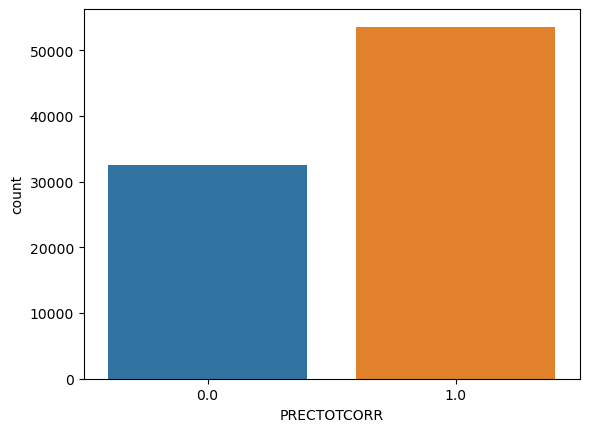

In [40]:
sns.countplot(d18["PRECTOTCORR"])

In [41]:
d18.to_csv("ambur-1.csv")

In [42]:
d18

,T2M,PRECTOTCORR,HR,DY,MO,YEAR,RH2M,WS50M,WS50M
0,23.22,0.0,5,1,6,2011,87.06,5.18,5.18
1,24.47,1.0,6,1,6,2011,79.94,4.91,4.91
2,27.87,1.0,7,1,6,2011,62.81,5.05,5.05
3,30.62,0.0,8,1,6,2011,52.69,3.79,3.79
4,32.59,0.0,9,1,6,2011,46.81,3.61,3.61
...,...,...,...,...,...,...,...,...,...
86203,26.58,1.0,0,1,4,2021,59.19,5.68,5.68
86204,26.01,1.0,1,1,4,2021,61.69,5.42,5.42
86205,25.51,1.0,2,1,4,2021,64.25,5.18,5.18
86206,25.08,1.0,3,1,4,2021,66.62,5.12,5.12
